# MILESTONE 1

```
Nama  : Theodorus Cahyo Adi Nugroho
Batch : RMT 021

URL Dashboard : [**Indonesia Rainfall Trend 2020**](https://public.tableau.com/app/profile/theo.nugraha/viz/IndonesiaRainfallTrend2020/INDONESIAWEATHERTREND2020#1)

## I. INTRODUCTION

I am a Data Analyst who gets a client who is one of the largest event organizers in Indonesia. The client wants to hold the biggest outdoor music concert in all of Indonesia on 2021. The concert cannot be held if the rainfall is very high because it can reduce the number of audience and damage some properties and sounds. The client asked for my help to analyze the regions in Indonesia with low rainfall and relatively sunny throughout 2020. I was asked to use statistics and data visualization dashboards to help them solve the problem.

## II. PROBLEM IDENTIFICATION

### II.I. PROBLEM STATEMENT

The problem statement in this case is Knowing the Rainfall Trends in Indonesia throughout 2020.

### II.II PROBLEM BACKGROUND

Indonesia is a country with two seasons, the dry season and the rainy season. The dry season starts from April to September, while the rainy season starts from October to March. From April to September, many outdoor events are usually held. This is because these months have low rainfall and events are not interrupted by rain. However, lately the weather and climate have been very unpredictable. Some outdoor concept events have failed to be held due to the unpredictable weather. This can result in the failure of the event and damage to the property and sound system. It can also result in a reduced audience at music events.

### II.III. PROBLEM DESCRIPTION

I used the 5W+1H method to describe the problem in this case. The description of the problem in this case is as follows:
1. What is the average rainfall in Indonesia during 2022 by month?
2. What is the average rainfall in Indonesia in 2022 by province? 
3. Which province has the highest and lowest rainfall during 2020? 
4. Which city has the highest and lowest rainfall in 2020?
5. When did the highest rainfall per month occur? In which city?
6. What is the correlation between rainfall and other parameters? What parameters cause high and low rainfall in an area? If so, why do these parameters strongly influence rainfall?
7. What are the unique characteristics of West Sumatra province, and how do outliers affect the data?
8. How does the average rainfall in West Sumatra province compare to the average rainfall in other provinces?
9. What are the results of the rainfall forecast based on the convidence interval?
10. What are the results of hypothesis testing to test the assumption that the average rainfall in West Sumatra province is equal to the average rainfall in all provinces?

### II.IV. OBJECTIVE

The objectives of this analysis are to:
1. Know the average rainfall in Indonesia throughout 2020 based on month and province.
2. Knowing the provinces and cities with the highest and lowest rainfall in Indonesia throughout 2020.
3. Knowing the time trend of the highest and lowest rainfall in Indonesia throughout 2020 by city.
4. Knowing the correlation of parameters that cause high or low rainfall.
5. Identify the unique characteristics of certain provinces, such as in West Sumatra, and analyze the impact of outliers on the data.
6. Conduct statistical tests to compare the average rainfall in a particular province, with rainfall in other provinces.
7. Calculating the convidence interval of rainfall to estimate rainfall.
8. Knowing the assumption of average rainfall in West Sumatra compared to all provinces using hypothesis testing method.
9. Provide insight to the client based on the results of the analysis for decision making on event procurement.

## III. DATA LOADING

Source dataset : [**Climate Data Daily IDN**](https://www.kaggle.com/datasets/greegtitan/indonesia-climate?select=climate_data.csv)

Query SQL :
``````
SELECT
t1.date,
t1.Tn,
t1.Tx,
t1.Tavg,
t1.RH_avg,
t1.RR,
t1.ss,
t1.ff_x,
t1.ddd_x,
t1.ff_avg,
t1.ddd_car,
t1.station_id,
t2.station_name,
t2.region_id,
t2.region_name,
t2.latitude,
t2.longitude,
t2.province_id,
t3.province_name
FROM hacktiv8.climate_data t1
JOIN hacktiv8.station_detail t2 ON t1.station_id = t2.station_id
JOIN hacktiv8.province_detail t3 ON t2.province_id = t3.province_id
WHERE t1.date BETWEEN '01-01-2020' AND '31-12-2020'
ORDER BY date;

In [1]:
# Import Library

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as st
import statistics
import seaborn as sns

In [2]:
# Take data from csv and store it in a variable named climate.

climate = pd.read_csv('Climate_Data_Daily_IDN_2020.csv')
climate

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_id,region_name,latitude,longitude,province_id,province_name
0,01-01-2020,26.0,35.0,27.7,84,1.8,6.0,8.0,240.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,440,Kab Maluku Tenggara Barat,-7.98000,131.3000,30,Maluku
1,01-01-2020,24.4,34.3,29.3,82,15.2,5.6,4.0,280.0,1.0,C,97760,Stasiun Meteorologi Utarom,494,Kab. Kaimana,-3.67000,133.7500,33,Papua Barat
2,01-01-2020,24.0,35.1,28.4,80,0.0,11.5,5.0,210.0,2.0,N,97724,Stasiun Meteorologi Pattimura,447,Kota Ambon,-3.71140,128.0957,30,Maluku
3,01-01-2020,24.2,31.0,27.1,81,0.0,2.8,2.0,70.0,1.0,E,97694,Stasiun Klimatologi Papua Barat,488,Kab. Manokwari,-1.47000,134.1900,33,Papua Barat
4,01-01-2020,24.3,32.6,27.8,73,0.0,0.4,5.0,260.0,2.0,W,97690,Stasiun Meteorologi Sentani,460,Kab. Jayapura,-2.57000,140.4800,32,Papua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382817,31-12-2020,23.6,32.5,27.3,88,1.2,0.6,5.0,200.0,1.0,C,96525,Stasiun Meteorologi Tanjung Harapan,503,Kab. Bulungan,2.50000,117.2200,34,Kalimantan Utara
382818,31-12-2020,20.4,26.4,23.1,90,26.3,4.5,2.0,129.0,1.0,SE,96257,Stasiun Geofisika Kepahiang,121,Kab. Kepahiang,-3.55000,102.5890,7,Bengkulu
382819,31-12-2020,22.8,29.4,25.9,88,41.0,1.2,2.0,320.0,1.0,NW,96291,Stasiun Klimatologi Lampung,132,Kab. Pesawaran,-5.17236,105.1800,8,Lampung
382820,31-12-2020,24.4,30.8,26.8,84,0.2,0.5,6.0,300.0,1.0,C,96293,Stasiun Meteorologi Maritim Panjang,136,Kota Bandar Lampung,-5.47210,105.3210,8,Lampung


In [3]:
# Display info from each column.

climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382822 entries, 0 to 382821
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           382822 non-null  object 
 1   Tn             382822 non-null  float64
 2   Tx             382822 non-null  float64
 3   Tavg           382822 non-null  float64
 4   RH_avg         382822 non-null  int64  
 5   RR             382822 non-null  float64
 6   ss             382822 non-null  float64
 7   ff_x           377962 non-null  float64
 8   ddd_x          376130 non-null  float64
 9   ff_avg         378088 non-null  float64
 10  ddd_car        375438 non-null  object 
 11  station_id     382822 non-null  int64  
 12  station_name   382822 non-null  object 
 13  region_id      382822 non-null  int64  
 14  region_name    382822 non-null  object 
 15  latitude       382822 non-null  float64
 16  longitude      382822 non-null  float64
 17  province_id    382822 non-nul

In [4]:
# Searching for missing values from each column.

climate.isna().sum()

date                0
Tn                  0
Tx                  0
Tavg                0
RH_avg              0
RR                  0
ss                  0
ff_x             4860
ddd_x            6692
ff_avg           4734
ddd_car          7384
station_id          0
station_name        0
region_id           0
region_name         0
latitude            0
longitude           0
province_id         0
province_name       0
dtype: int64

In [5]:
# Calculating the percentage of missing values.

ff_x_null               = climate['ff_x'].isna().sum()
ddd_x_null              = climate['ddd_x'].isna().sum()
ff_avg_null             = climate['ff_avg'].isna().sum()
ddd_car_null            = climate['ddd_car'].isna().sum()

mv_ff_x_null            = ff_x_null / climate['ff_x'].shape[0] * 100
mv_ddd_x_null           = ddd_x_null / climate['ddd_x'].shape[0] * 100
mv_ff_avg_null          = ff_avg_null / climate['ff_avg'].shape[0] * 100
mv_ddd_car_null         = ddd_car_null / climate['ddd_car'].shape[0] * 100

print('MISSING VALUE PERCENTAGE')
print('------------------------')
print('')
print('ff_x     : ',mv_ff_x_null)
print('')
print('ddd_x    : ',mv_ddd_x_null)
print('')
print('ff_avg   : ',mv_ff_avg_null)
print('')
print('ddd_car  : ',mv_ddd_car_null)



MISSING VALUE PERCENTAGE
------------------------

ff_x     :  1.2695195155973271

ddd_x    :  1.7480709050159082

ff_avg   :  1.2366060466744335

ddd_car  :  1.928833766084499


In [6]:
# Display the top 10 data.

climate.head(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_id,region_name,latitude,longitude,province_id,province_name
0,01-01-2020,26.0,35.0,27.7,84,1.8,6.0,8.0,240.0,2.0,C,97900,Stasiun Meteorologi Mathilda Batlayeri,440,Kab Maluku Tenggara Barat,-7.98000,131.30000,30,Maluku
1,01-01-2020,24.4,34.3,29.3,82,15.2,5.6,4.0,280.0,1.0,C,97760,Stasiun Meteorologi Utarom,494,Kab. Kaimana,-3.67000,133.75000,33,Papua Barat
2,01-01-2020,24.0,35.1,28.4,80,0.0,11.5,5.0,210.0,2.0,N,97724,Stasiun Meteorologi Pattimura,447,Kota Ambon,-3.71140,128.09570,30,Maluku
3,01-01-2020,24.2,31.0,27.1,81,0.0,2.8,2.0,70.0,1.0,E,97694,Stasiun Klimatologi Papua Barat,488,Kab. Manokwari,-1.47000,134.19000,33,Papua Barat
4,01-01-2020,24.3,32.6,27.8,73,0.0,0.4,5.0,260.0,2.0,W,97690,Stasiun Meteorologi Sentani,460,Kab. Jayapura,-2.57000,140.48000,32,Papua
5,01-01-2020,24.2,30.4,26.0,90,4.2,6.0,5.0,10.0,2.0,S,97682,Stasiun Meteorologi Nabire,461,Kab. Nabire,-3.35210,135.52000,32,Papua
6,01-01-2020,23.3,31.8,26.4,88,4.9,1.7,3.0,250.0,0.0,C,97692,Stasiun Klimatologi Jayapura,460,Kab. Jayapura,-2.59231,140.16792,32,Papua
7,01-01-2020,25.2,31.6,28.6,84,3.0,9.8,6.0,360.0,2.0,NW,97282,Stasiun Meteorologi Komodo,303,Kab. Manggarai Barat,-8.48673,119.88683,19,Nusa Tenggara Timur
8,01-01-2020,23.4,31.2,26.5,89,0.5,9.0,8.0,300.0,4.0,NW,97260,Stasiun Meteorologi Sultan Muhammad Kaharuddin,282,Kab. Sumbawa,-8.48845,117.41336,18,Nusa Tenggara Barat
9,01-01-2020,25.0,34.0,27.3,87,3.5,4.0,6.0,10.0,1.0,C,97270,Stasiun Meteorologi Sultan Muhammad Salahuddin,288,Kota Bima,-8.54279,118.69280,18,Nusa Tenggara Barat


In [7]:
# Display the bottom 10 data.

climate.tail(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_id,region_name,latitude,longitude,province_id,province_name
382812,31-12-2020,19.6,28.6,22.3,82,6.7,5.5,6.0,310.0,2.0,NW,96207,Stasiun Meteorologi Depati Parbo,88,Kab. Kerinci,-2.08300,101.45000,5,Jambi
382813,31-12-2020,22.2,27.6,24.9,90,97.5,3.4,4.0,320.0,2.0,NW,96195,Stasiun Meteorologi Sultan Thaha,97,Kota Jambi,-1.63368,103.64000,5,Jambi
382814,31-12-2020,22.4,27.6,25.4,92,137.9,0.7,2.0,350.0,1.0,C,96191,Stasiun Klimatologi Jambi,92,Kab. Muaro Jambi,-1.60190,103.48444,5,Jambi
382815,31-12-2020,23.6,30.6,25.5,96,7.3,0.0,3.0,70.0,1.0,C,96529,Stasiun Meteorologi Kalimarau,353,Kab. Berau,2.14562,117.43375,23,Kalimantan Timur
382816,31-12-2020,24.0,31.8,27.7,86,0.0,0.0,3.0,230.0,1.0,C,96509,Stasiun Meteorologi Juwata,507,Kota Tarakan,3.33000,117.57000,34,Kalimantan Utara
382817,31-12-2020,23.6,32.5,27.3,88,1.2,0.6,5.0,200.0,1.0,C,96525,Stasiun Meteorologi Tanjung Harapan,503,Kab. Bulungan,2.50000,117.22000,34,Kalimantan Utara
382818,31-12-2020,20.4,26.4,23.1,90,26.3,4.5,2.0,129.0,1.0,SE,96257,Stasiun Geofisika Kepahiang,121,Kab. Kepahiang,-3.55000,102.58900,7,Bengkulu
382819,31-12-2020,22.8,29.4,25.9,88,41.0,1.2,2.0,320.0,1.0,NW,96291,Stasiun Klimatologi Lampung,132,Kab. Pesawaran,-5.17236,105.18000,8,Lampung
382820,31-12-2020,24.4,30.8,26.8,84,0.2,0.5,6.0,300.0,1.0,C,96293,Stasiun Meteorologi Maritim Panjang,136,Kota Bandar Lampung,-5.47210,105.32100,8,Lampung
382821,31-12-2020,23.4,30.2,26.5,84,13.3,6.4,3.0,290.0,2.0,W,96255,Stasiun Klimatologi Bengkulu,123,Kota Bengkulu,-3.86520,102.31190,7,Bengkulu


**Analysis:**

1. Based on the dataset that I use, there are Missing Value in column :
    - ff_x as many as 4,860 with a percentage of 1.27%
    - ddd_x as many as 6,692 with a percentage of 1.75%
    - ff_avg as many as 4,734 with a percentage of 1.24%
    - ddd_car as many as 7,384 with a percentage of 1.93%
2. Missing Value filling is required in the ff_x, ddd_x and ff_avg columns with the average value of each column.
3. Filling the Missing Value in the ddd_car column with -.
4. Change the data type of the date column from object data type to datetime data type.

## IV. DATA CLEANING

In [8]:
# Fill in the data in the column that has missing values.

climate['ff_x'] = climate['ff_x'].fillna(climate['ff_x'].mean())
climate['ddd_x'] = climate['ddd_x'].fillna(climate['ddd_x'].mean())
climate['ff_avg'] = climate['ff_avg'].fillna(climate['ff_avg'].mean())

climate['ddd_car'] = climate['ddd_car'].fillna('-')

climate.isna().sum()

date             0
Tn               0
Tx               0
Tavg             0
RH_avg           0
RR               0
ss               0
ff_x             0
ddd_x            0
ff_avg           0
ddd_car          0
station_id       0
station_name     0
region_id        0
region_name      0
latitude         0
longitude        0
province_id      0
province_name    0
dtype: int64

In [9]:
# Change the data type of the date column from object data type to datetime data type.

climate['date'] = pd.to_datetime(climate.date, dayfirst=True)
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382822 entries, 0 to 382821
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           382822 non-null  datetime64[ns]
 1   Tn             382822 non-null  float64       
 2   Tx             382822 non-null  float64       
 3   Tavg           382822 non-null  float64       
 4   RH_avg         382822 non-null  int64         
 5   RR             382822 non-null  float64       
 6   ss             382822 non-null  float64       
 7   ff_x           382822 non-null  float64       
 8   ddd_x          382822 non-null  float64       
 9   ff_avg         382822 non-null  float64       
 10  ddd_car        382822 non-null  object        
 11  station_id     382822 non-null  int64         
 12  station_name   382822 non-null  object        
 13  region_id      382822 non-null  int64         
 14  region_name    382822 non-null  object        
 15  

In [10]:
# Delete column that are not used for analysis.

del climate['station_name']

In [11]:
# Delete regions and provinces that are not used for analysis and store back to variable named climate.

climate =  climate[(climate['province_id'] != 9) &
   (climate['province_id'] != 10) &
   (climate['province_id'] != 18) &
   (climate['province_id'] != 19) &
   (climate['province_id'] != 30) &
   (climate['province_id'] != 31)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name']]

In [12]:
# Added a month column named month to make it easier to analyze by month.

climate['month'] = climate['date'].dt.strftime("%m")

In [13]:
climate.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,region_id,region_name,latitude,longitude,province_id,province_name,month
1,2020-01-01,24.4,34.3,29.3,82,15.2,5.6,4.0,280.0,1.0,C,97760,494,Kab. Kaimana,-3.67000,133.75000,33,Papua Barat,01
3,2020-01-01,24.2,31.0,27.1,81,0.0,2.8,2.0,70.0,1.0,E,97694,488,Kab. Manokwari,-1.47000,134.19000,33,Papua Barat,01
4,2020-01-01,24.3,32.6,27.8,73,0.0,0.4,5.0,260.0,2.0,W,97690,460,Kab. Jayapura,-2.57000,140.48000,32,Papua,01
5,2020-01-01,24.2,30.4,26.0,90,4.2,6.0,5.0,10.0,2.0,S,97682,461,Kab. Nabire,-3.35210,135.52000,32,Papua,01
6,2020-01-01,23.3,31.8,26.4,88,4.9,1.7,3.0,250.0,0.0,C,97692,460,Kab. Jayapura,-2.59231,140.16792,32,Papua,01


In [14]:
climate.tail()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,region_id,region_name,latitude,longitude,province_id,province_name,month
382817,2020-12-31,23.6,32.5,27.3,88,1.2,0.6,5.0,200.0,1.0,C,96525,503,Kab. Bulungan,2.50000,117.2200,34,Kalimantan Utara,12
382818,2020-12-31,20.4,26.4,23.1,90,26.3,4.5,2.0,129.0,1.0,SE,96257,121,Kab. Kepahiang,-3.55000,102.5890,7,Bengkulu,12
382819,2020-12-31,22.8,29.4,25.9,88,41.0,1.2,2.0,320.0,1.0,NW,96291,132,Kab. Pesawaran,-5.17236,105.1800,8,Lampung,12
382820,2020-12-31,24.4,30.8,26.8,84,0.2,0.5,6.0,300.0,1.0,C,96293,136,Kota Bandar Lampung,-5.47210,105.3210,8,Lampung,12
382821,2020-12-31,23.4,30.2,26.5,84,13.3,6.4,3.0,290.0,2.0,W,96255,123,Kota Bengkulu,-3.86520,102.3119,7,Bengkulu,12


In [15]:
climate.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,region_id,region_name,latitude,longitude,province_id,province_name,month
1,2020-01-01,24.4,34.3,29.3,82,15.2,5.6,4.0,280.0,1.0,C,97760,494,Kab. Kaimana,-3.67000,133.75000,33,Papua Barat,01
3,2020-01-01,24.2,31.0,27.1,81,0.0,2.8,2.0,70.0,1.0,E,97694,488,Kab. Manokwari,-1.47000,134.19000,33,Papua Barat,01
4,2020-01-01,24.3,32.6,27.8,73,0.0,0.4,5.0,260.0,2.0,W,97690,460,Kab. Jayapura,-2.57000,140.48000,32,Papua,01
5,2020-01-01,24.2,30.4,26.0,90,4.2,6.0,5.0,10.0,2.0,S,97682,461,Kab. Nabire,-3.35210,135.52000,32,Papua,01
6,2020-01-01,23.3,31.8,26.4,88,4.9,1.7,3.0,250.0,0.0,C,97692,460,Kab. Jayapura,-2.59231,140.16792,32,Papua,01


In [16]:
climate = climate[(climate['date'] >= '2020-01-01') &
                (climate['date'] <= '2020-12-31')][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

## V. EXPLORATORY DATA ANALYSIS

**Feature Description**
- Tn            : min temperature (°C)
- Tx            : max temperature (°C)
- Tavg          : avg temperature (°C)
- RH_avg        : avg humidity (%)
- RR            : rainfall (mm)
- ss            : duration of sunshine (hour)
- ff_x          : max wind speed (m/s)
- ddd_x	        : wind direction at maximum speed (°)
- ff_avg        : avg wind speed (m/s)
- ddd_car       : most wind direction (°)
- station_id    : station id which record the data. Detail of the station can be found in station_detail.csv

Based on BMKG, the threshold values used to determine rain intensity are as follows:
- 0 mm/day: Cloudy
- 0.5 - 20 mm/day : Light rain
- 20 - 50 mm/day : Moderate rain
- 50 - 100 mm/day : Heavy rain
- 100 - 150 mm/day : Very heavy rain
- More than 150 mm/day : Extreme rain

## VI. COUNTING & ANALYSIS

### VI. I. Average rainfall in Indonesia throughout 2022 by month.

Average rainfall per month on Indonesia throughout 2022: 
 month
01    11.947164
02    12.424947
03    11.479872
04    11.616546
05     9.986458
06     8.248911
07     7.932800
08     5.931940
09     9.391680
10     9.670061
11    11.261053
12    12.196647
Name: RR, dtype: float64


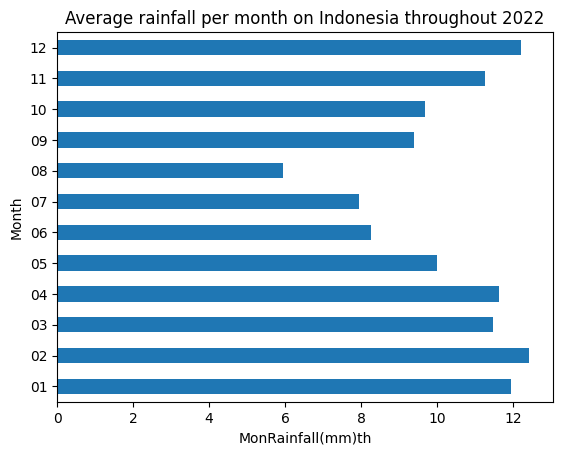

In [17]:
# Average rainfall in Indonesia throughout 2022 by month.

AVG_month      = climate.groupby('month')['RR'].mean()
AVG_month_plot = AVG_month.plot(kind='barh', title='Average rainfall per month on Indonesia throughout 2022', xlabel='MonRainfall(mm)th', ylabel='Month')
print('Average rainfall per month on Indonesia throughout 2022: \n',AVG_month)
AVG_month_plot;

**ANALYSIS OF AVERAGE RAINFALL IN INDONESIA BY MONTH**

Based on the data above, we can see that the average rainfall in Indonesia throughout 2020 is classified as light rain. The highest average rainfall is in February and the lowest average rainfall is in August.

### VI.II. Average rainfall in Indonesia throughout 2022 by province.

Average rainfall in Indonesia throughout 2022 by provinces: 
 province_name
Gorontalo                    4.334545
Bali                         4.935223
Sulawesi Barat               5.745122
Sulawesi Tengah              7.446266
Banten                       7.701456
Riau                         8.159202
Sulawesi Tenggara            8.270219
Jawa Timur                   8.361368
Sulawesi Utara               9.160086
Nanggroe Aceh Darussalam     9.162708
Papua Barat                  9.474935
Sumatera Selatan             9.954971
Jawa Tengah                 10.003352
Sumatera Utara              10.087123
Kalimantan Timur            10.097902
Kalimantan Utara            10.270735
DI Yogyakarta               10.345783
Jambi                       10.896829
DKI Jakarta                 11.013850
Papua                       11.311122
Jawa Barat                  11.503207
Kalimantan Selatan          11.601216
Kalimantan Tengah           11.701668
Sulawesi Selatan            11.771598
Kalimantan B

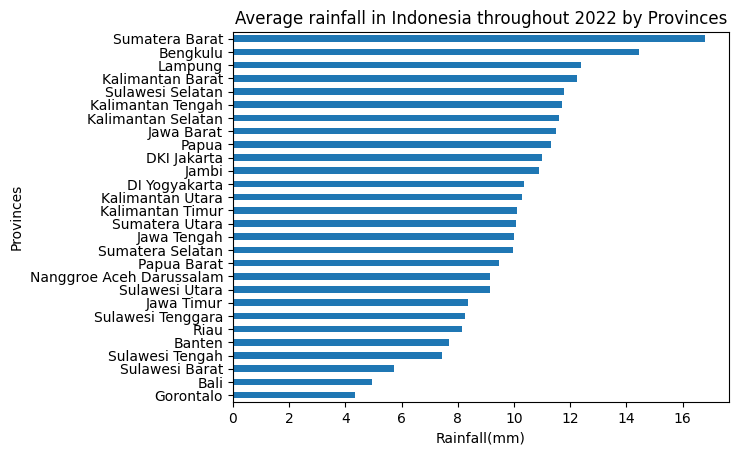

In [18]:
# Average rainfall in Indonesia throughout 2022 by provinces.

AVG_provinces      = climate.groupby('province_name')['RR'].mean().sort_values(ascending=True)
AVG_provinces_plot = AVG_provinces.plot(kind='barh', title='Average rainfall in Indonesia throughout 2022 by Provinces', xlabel='Rainfall(mm)', ylabel='Provinces')
print('Average rainfall in Indonesia throughout 2022 by provinces: \n',AVG_provinces)
AVG_provinces_plot;

**ANALYSIS OF AVERAGE RAINFALL IN INDONESIA BY PROVINCES**

Based on the data above, we can find out that the overall average rainfall in Indonesia throughout 2020 by province is classified as light rain. The highest average rainfall is in West Sumatra province and the lowest average rainfall is in Gorontalo province.

### VI.III. Provinces with the highest and lowest rainfall throughout 2020

In [19]:
# Create groups based on rainfall threshold values based on BMKG.

extreme_rain            = climate[(climate['RR'] > 150)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

very_heavy_rain         = climate[(climate['RR'] > 100) &
                              (climate['RR'] <= 150)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

heavy_rain              = climate[(climate['RR'] > 50) &
                              (climate['RR'] <= 100)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

moderate_rain           = climate[(climate['RR'] > 20) &
                              (climate['RR'] <= 50)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

light_rain              = climate[(climate['RR'] > 0.5) &
                              (climate['RR'] <= 20)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

cloudy                  = climate[(climate['RR'] >= 0) &
                              (climate['RR'] <= 0.5)][['date', 'Tn', 'Tx', 
                                    'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 
                                    'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 
                                    'region_id', 'region_name', 'latitude', 
                                    'longitude', 'province_id', 'province_name','month']]

In [20]:
# Create a filter to display provinces with the highest rainfall from provinces that have experienced extreme rainfall levels.

RR_max = extreme_rain.groupby('province_name')['RR'].max()
print('Provinces with The Highest Rainfall throughout 2020 \n',RR_max.sort_values(ascending=False))

Provinces with The Highest Rainfall throughout 2020 
 province_name
DKI Jakarta                 277.5
Sumatera Barat              235.2
DI Yogyakarta               230.5
Jawa Barat                  212.3
Banten                      208.9
Sulawesi Utara              196.5
Papua                       191.0
Papua Barat                 189.6
Jawa Tengah                 189.1
Kalimantan Tengah           185.7
Sumatera Utara              170.6
Kalimantan Barat            168.0
Bengkulu                    159.1
Kalimantan Utara            157.3
Nanggroe Aceh Darussalam    156.4
Name: RR, dtype: float64


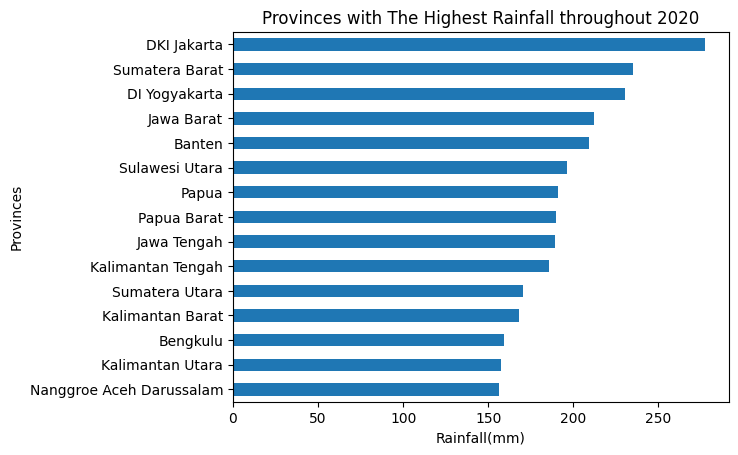

In [21]:
# Create plots to simplify the analysis process.

RR_max.sort_values(ascending=True).plot(kind='barh',title='Provinces with The Highest Rainfall throughout 2020', ylabel='Provinces', xlabel='Rainfall(mm)');

In [22]:
# Create a filter to display provinces with the lowest rainfall from provinces that have experienced cloudy levels.

RR_min = cloudy.groupby('province_name')['RR'].min()
print('Provinces with The Lowest Rainfall throughout 2020 \n',RR_min.sort_values(ascending=False))

Provinces with The Lowest Rainfall throughout 2020 
 province_name
Bali                        0.0
Banten                      0.0
Sumatera Selatan            0.0
Sumatera Barat              0.0
Sulawesi Utara              0.0
Sulawesi Tenggara           0.0
Sulawesi Tengah             0.0
Sulawesi Selatan            0.0
Sulawesi Barat              0.0
Riau                        0.0
Papua Barat                 0.0
Papua                       0.0
Nanggroe Aceh Darussalam    0.0
Lampung                     0.0
Kalimantan Utara            0.0
Kalimantan Timur            0.0
Kalimantan Tengah           0.0
Kalimantan Selatan          0.0
Kalimantan Barat            0.0
Jawa Timur                  0.0
Jawa Tengah                 0.0
Jawa Barat                  0.0
Jambi                       0.0
Gorontalo                   0.0
DKI Jakarta                 0.0
DI Yogyakarta               0.0
Bengkulu                    0.0
Sumatera Utara              0.0
Name: RR, dtype: float64


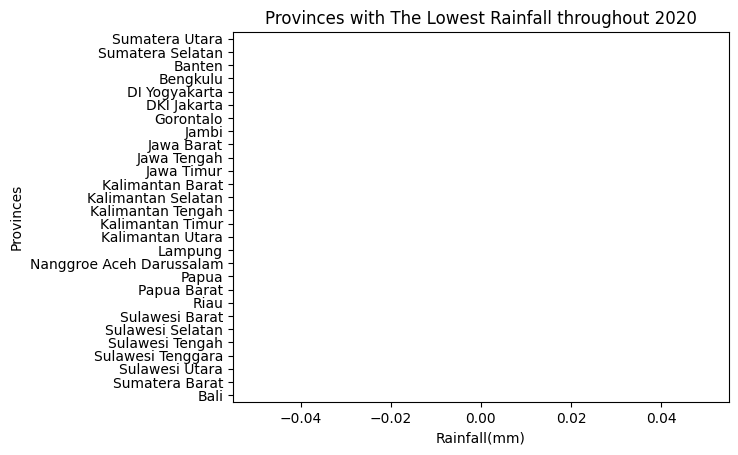

In [23]:
# Create plots to simplify the analysis process.

RR_min.sort_values(ascending=True).plot(kind='barh',title='Provinces with The Lowest Rainfall throughout 2020', ylabel='Provinces', xlabel='Rainfall(mm)');

**ANALYSIS OF PROVINCES WITH THE HIGHEST AND LOWEST RAINFALL LEVELS IN INDONESIA THROUGHOUT 2020**

1. Based on the results of the data we obtained and looking at the rainfall level parameters, we can find out that the provinces of DKI Jakarta, West Sumatra, DI Yogyakarta, West Java, Banten, North Sulawesi, Papua, West Papua, Central Java, Central Borneo, North Sumatra, West Borneo, Bengkulu, North Borneo and Nanggroe Aceh Darussalam have experienced very extreme rainfall levels in 2020 because the rainfall level is more than 150mm per day.

2. All provinces have experienced the lowest rainfall and it can be said that all provinces have experienced no rainfall at all or cloudy days.

### VI.IV. Cities that have the highest and lowest rainfall throughout 2020.

In [24]:
# Create a filter to display region with the highest rainfall from region that have experienced extreme rainfall levels.

RR_max_region = extreme_rain.groupby('region_name')['RR'].max()
print(RR_max_region.count())
print('Region with The Highest Rainfall throughout 2020 \n',RR_max_region.sort_values(ascending=False))

24
Region with The Highest Rainfall throughout 2020 
 region_name
Kota Adm. Jakarta Pusat    277.5
Kota Padang                235.2
Kab. Sleman                230.5
Kab. Majalengka            212.3
Kota Tangerang Selata      208.9
Kota Bitung                196.5
Kab. Mimika                191.0
Kab. Manokwari             189.6
Kab. Tegal                 189.1
Kab. Padang Pariaman       188.9
Kota Palangkaraya          185.7
Kab. Minahasa Utara        172.6
Kab. Deli Serdang          170.6
Kab. Nabire                169.9
Kota Pontianak             168.0
Kab. Pontianak             163.9
Kota Bandung               160.0
Kota Bengkulu              159.1
Kota Medan                 159.0
Kab. Tapanuli Tengah       158.7
Kab. Jayapura              157.8
Kab. Nunukan               157.3
Kab. Nagan Raya            156.4
Kota Manado                151.8
Name: RR, dtype: float64


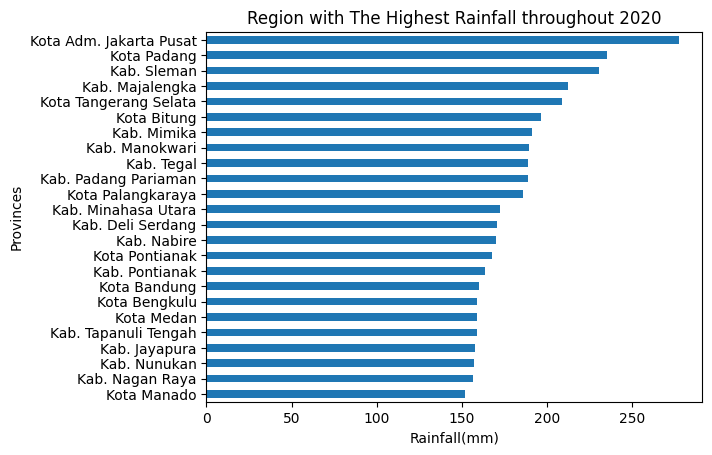

In [25]:
# Create plots to simplify the analysis process.

RR_max_region.sort_values(ascending=True).plot(kind='barh',title='Region with The Highest Rainfall throughout 2020', ylabel='Provinces', xlabel='Rainfall(mm)');

In [26]:
# Create a filter to display region with the lowest rainfall from region that have experienced cloudy levels.

RR_min_region = cloudy.groupby('region_name')['RR'].min()
print('Region with The Lowest Rainfall throughout 2020 \n',RR_min.sort_values(ascending=False))

Region with The Lowest Rainfall throughout 2020 
 province_name
Bali                        0.0
Banten                      0.0
Sumatera Selatan            0.0
Sumatera Barat              0.0
Sulawesi Utara              0.0
Sulawesi Tenggara           0.0
Sulawesi Tengah             0.0
Sulawesi Selatan            0.0
Sulawesi Barat              0.0
Riau                        0.0
Papua Barat                 0.0
Papua                       0.0
Nanggroe Aceh Darussalam    0.0
Lampung                     0.0
Kalimantan Utara            0.0
Kalimantan Timur            0.0
Kalimantan Tengah           0.0
Kalimantan Selatan          0.0
Kalimantan Barat            0.0
Jawa Timur                  0.0
Jawa Tengah                 0.0
Jawa Barat                  0.0
Jambi                       0.0
Gorontalo                   0.0
DKI Jakarta                 0.0
DI Yogyakarta               0.0
Bengkulu                    0.0
Sumatera Utara              0.0
Name: RR, dtype: float64


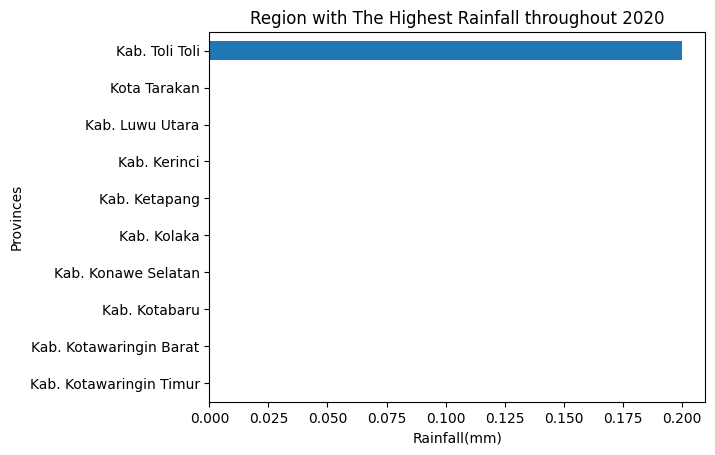

In [27]:
# Create plots to simplify the analysis process.

RR_min_region.sort_values(ascending=True).tail(10).plot(kind='barh',title='Region with The Highest Rainfall throughout 2020', ylabel='Provinces', xlabel='Rainfall(mm)');

**ANALYSIS OF REGION WITH THE HIGHEST AND LOWEST RAINFALL LEVELS IN INDONESIA THROUGHOUT 2020**

1. Based on the results of the data we obtained and looking at the rainfall level parameters, we can find out that Kota Adm. Jakarta Pusat, Kota Padang, Kab. Sleman, Kab. Majalengka, Kota Tangerang Selatan, Kota Bitung, Kab. Mimika, Kab. Manokwari, Kab. Tegal, Kab. Padang Pariaman, Kota Palangkaraya, Kab. Minahasa Utara, Kab. Deli Serdang, Kab. Nabire, Kota Pontianak, Kab. Pontianak, Kota Bandung, Kota Bengkulu, Kota Medan, Kab. Tapanuli Tengah, Kab. Jayapura, Kab. Nunukan, Kab. Nagan Raya and Kota Manado have experienced very extreme rainfall levels in 2020 because the rainfall level is more than 150mm per day.

2. All regions have experienced the lowest rainfall and it can be said that all regions have experienced no rainfall at all or cloudy days.

### VI.V. The highest rainfall per month occurs. In which city?

In [28]:
extreme_rain.groupby('month')[['date','region_name','RR']].max()

,date,region_name,RR
month,,,
01,2020-01-29,Kota Tangerang Selata,208.9
02,2020-02-25,Kota Adm. Jakarta Pusat,277.5
03,2020-03-04,Kota Manado,189.6
04,2020-04-29,Kota Bengkulu,170.6
05,2020-05-02,Kota Bandung,160.0
06,2020-06-16,Kab. Mimika,159.8
07,2020-07-28,Kab. Padang Pariaman,188.9
09,2020-09-28,Kota Padang,235.2
11,2020-11-24,Kota Pontianak,168.0


**ANALYSIS OF REGION WITH THE HIGHEST RAINFALL LEVELS IN INDONESIA THROUGHOUT 2020**

Based on the data above, we can find out that we should avoid South Tangerang City in January, Central Adm. Central Jakarta in February, Manado City in March, Bengkulu City in April, Bandung City in May, Mimika Regency in June, Padang Pariaman Regency in July, Padang City in September, Pontianak City in November and Sleman Regency in December because in these months the peak rainfall in the area is at an extreme level.

### VI.VI The correlation between rainfall and other parameters.

In [29]:
# Inputting all parameters to the variables to calculate the correlation.

climate_corr = climate[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'longitude', 'latitude']]

In [30]:
climate_corr.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,longitude,latitude
count,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000,27216.000000
mean,23.664491,31.574673,26.941865,83.933422,10.279879,5.118136,4.322715,184.763396,1.571549,113.451384,-2.496059
std,1.988727,2.096380,1.861448,30.655472,18.902320,5.214445,1.896346,103.207888,0.942982,11.406117,3.843471
min,12.000000,18.600000,17.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.337850,-8.750000
25%,23.000000,30.600000,26.300000,80.000000,0.000000,2.600000,3.000000,92.000000,1.000000,105.321000,-6.111850
50%,24.000000,32.000000,27.200000,84.000000,2.000000,5.200000,4.000000,182.500000,1.000000,111.991770,-2.730000
75%,24.800000,33.000000,28.100000,88.000000,11.900000,7.500000,5.000000,270.000000,2.000000,119.572000,0.075000
max,40.000000,37.300000,33.300000,5045.000000,277.500000,705.000000,46.000000,360.000000,12.000000,140.720000,5.876550


In [31]:
# Calculate the correlation.

climate_corr.corr()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,longitude,latitude
Tn,1.000000,0.566252,0.836173,-0.018598,-0.097578,0.078936,0.130514,0.000906,0.169248,-0.053347,0.018110
Tx,0.566252,1.000000,0.817436,-0.089753,-0.174369,0.133059,0.088568,-0.064938,0.072626,-0.131836,0.096085
Tavg,0.836173,0.817436,1.000000,-0.086975,-0.164714,0.133834,0.134808,-0.049161,0.188897,-0.063881,0.035874
RH_avg,-0.018598,-0.089753,-0.086975,1.000000,0.057441,-0.040495,-0.035270,0.025261,-0.063005,0.000083,0.050460
RR,-0.097578,-0.174369,-0.164714,0.057441,1.000000,-0.103254,-0.076581,0.066637,-0.111951,-0.017188,0.008647
ss,0.078936,0.133059,0.133834,-0.040495,-0.103254,1.000000,0.047669,-0.041961,0.078681,0.015778,-0.057013
ff_x,0.130514,0.088568,0.134808,-0.035270,-0.076581,0.047669,1.000000,0.079890,0.651934,0.040439,-0.067379
ddd_x,0.000906,-0.064938,-0.049161,0.025261,0.066637,-0.041961,0.079890,1.000000,0.047875,-0.018795,-0.019362
ff_avg,0.169248,0.072626,0.188897,-0.063005,-0.111951,0.078681,0.651934,0.047875,1.000000,0.019253,-0.107075
longitude,-0.053347,-0.131836,-0.063881,0.000083,-0.017188,0.015778,0.040439,-0.018795,0.019253,1.000000,-0.191912


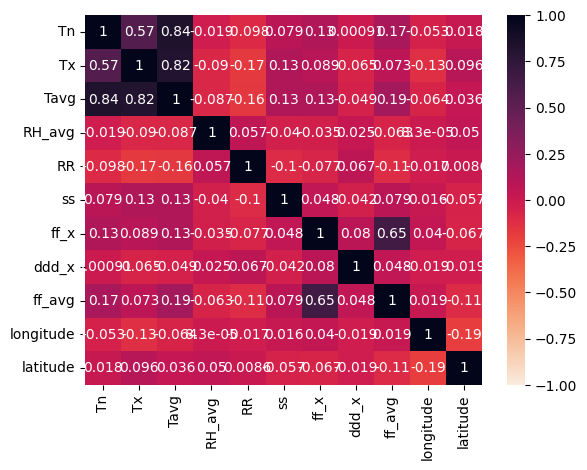

In [32]:
# Plotting to simplify the process of analyzing the correlation between parameters.

sns.heatmap(climate_corr.corr(), vmin=-1, vmax=1,
annot=True, cmap="rocket_r")
plt.show()

**CORRELATION ANALYSIS**

Based on the calculation of the correlation value above, we can see that the correlation value between rainfall and other parameters is as follows:

- Negative Correlation:
    - RR with Tn = -0.098
    - RR with Tx = -0.174
    - RR with Tavg = -0.165
    - RR with ss = -0.103
    - RR with ff_x = -0.077
    - RR with ff_avg = -0.112
    - RR with longitude = -0.017

- Positive Correlation:
    - RR with RH_avg = 0.057
    - RR with ddd_x = 0.067
    - RR with latitude = 0.009

From the above results, we can conclude that:
1. There is negative correlation between rainfall and minimum temperature, maximum temperature, average temperature, duration of sunshine, maximum air speed, average air speed and longitude. It can be concluded that the higher the rainfall, the lower the minimum temperature, maximum temperature, average temperature, duration of sunshine, maximum air speed, average air speed and longitude with a very weak correlation level, so it doesn't really affect much.
2. There is positive correlation between rainfall and average humidity, most wind directions and latitudes. It can be concluded that the higher the rainfall, the higher the average humidity, most wind directions and latitudes with a very weak correlation level, so it does not affect much.
3. So based on the weather dataset in Indonesia throughout 2020, the high and low rainfall is not influenced by other parameters.

### VI.VII. Stats Data Analysis

#### VI.VII.I. Central Tendency

In [33]:
# Calculate mean and median for each regions.
central_tendency = climate.groupby('province_name')['RR'].agg(['mean', 'median'])

# Calculate mode for each regions.
mode = climate.groupby('province_name')['RR'].apply(lambda x: x.mode().iloc[0])
central_tendency['mode'] = mode

central_tendency

,mean,median,mode
province_name,,,
Bali,4.935223,0.00,0.0
Banten,7.701456,0.80,0.0
Bengkulu,14.461899,3.90,0.0
DI Yogyakarta,10.345783,1.00,0.0
DKI Jakarta,11.013850,1.00,0.0
Gorontalo,4.334545,0.00,0.0
Jambi,10.896829,2.80,0.0
Jawa Barat,11.503207,2.80,0.0
Jawa Tengah,10.003352,1.20,0.0


In [34]:
# Select the province with the highest province's mean.
province = central_tendency['mean'].idxmax()
print('Selected Province: ', province)


Selected Province:  Sumatera Barat


**ANALYSIS OF CENTRAL TENDENCY OF PROVINCES IN INDONESIA**

Based on the data above, we can find out the average rainfall, median or middle value of rainfall and mode or frequent rainfall value of each province. 

In this case, I chose to analyze the province of West Sumatra because it has the highest average rainfall. In addition, because West Sumatra province also has a rainfall value of 0 which means cloudy.

Next, I will check for outliers, because outliers can make the analysis results inaccurate and affect the average and central tendency. I will use the IQR (Interquartile Range) method because it is robust to extreme values and works well for non-normally distributed data to detect outliers.

#### VI.VII.II. Identifying and Handling Outliers

In [35]:
# Insert data column RR from West Sumatra province into variable sumatera_barat.

sumatera_barat  = climate[(climate['province_name'] == 'Sumatera Barat')][['date','RR', 'region_name','province_name','month']]

#sumatera_barat.to_csv("sumatera_barat.csv")


In [36]:
# Calculate Q1, Q3, and IQR.

Q1 = sumatera_barat['RR'].quantile(0.25)
Q3 = sumatera_barat['RR'].quantile(0.75)
IQR = Q3 - Q1
print('Q1   : ',Q1)
print('Q2   : ',Q3)
print('IQR  : ',IQR)

Q1   :  0.7
Q2   :  21.75
IQR  :  21.05


In [37]:
# Define bounds for outliers.

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound: ',lower_bound)
print('Upper Bound: ',upper_bound)

Lower Bound:  -30.875000000000004
Upper Bound:  53.325


In [38]:
# Identify outliers.

outliers = sumatera_barat['RR'][(sumatera_barat['RR'] < lower_bound) | (sumatera_barat['RR'] > upper_bound)]

In [39]:
# Counting the number of outliers.

print('Number of outliers: ',outliers.count())

Number of outliers:  58


In [40]:
# Calculate percentage of outliers

percentage_outliers = len(outliers) / len(sumatera_barat) * 100
print('Percentage Outliers: ', percentage_outliers)

Percentage Outliers:  7.723035952063914


In [41]:
# Remove outliers and count the number of data after outliers are removed. 

sumatera_barat_clean = sumatera_barat[(sumatera_barat['RR'] >= lower_bound) & (sumatera_barat['RR'] <= upper_bound)]
print('Number of clean data: ',sumatera_barat_clean.count()[0])

Number of clean data:  693


In [42]:
# Calculate central tendencies before and after removing outliers

ct_before = sumatera_barat['RR'].agg(['mean', 'median']).to_frame('before_removal')
ct_after  = sumatera_barat_clean['RR'].agg(['mean', 'median']).to_frame('after_removal')

pd.concat([ct_before, ct_after], axis=1)

,before_removal,after_removal
mean,16.808123,10.405916
median,5.400000,4.500000


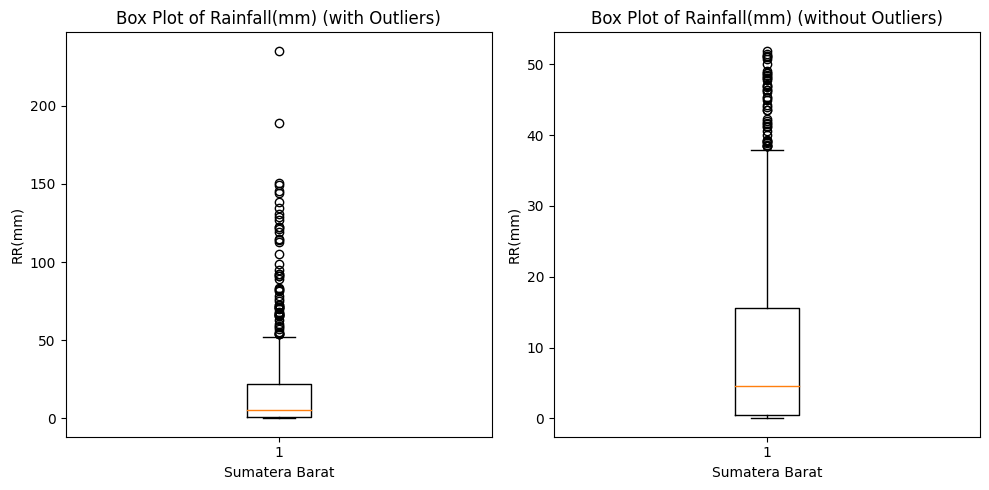

In [43]:
# Create subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Box plot of sumatera_barat
axes[0].boxplot(sumatera_barat['RR'])
axes[0].set_xlabel('Sumatera Barat')
axes[0].set_ylabel('RR(mm)')
axes[0].set_title('Box Plot of Rainfall(mm) (with Outliers)')

# Box plot of sumatera_barat_clean
axes[1].boxplot(sumatera_barat_clean['RR'])
axes[1].set_xlabel('Sumatera Barat')
axes[1].set_ylabel('RR(mm)')
axes[1].set_title('Box Plot of Rainfall(mm) (without Outliers)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**ANALYSIS OF OUTLIERS**

Based on the results of the calculation to find outliers, we can find out that there are 58 outliers with a percentage of 7.72%. The amount of data that is clean from outliers is 693. In addition, there is a decrease in the mean (average) and median (middle value) of rainfall in West Sumatra province after cleaning out the outliers. This shows that outliers with higher values that raise the mean. By removing the outliers, we can know the rainfall data in West Sumatra more accurately.

#### VI.VII.III. Range, Variance & Standard Deviation

In [44]:
# Calculate Range, Variance, and Standard Deviation

range       = sumatera_barat_clean['RR'].max() - sumatera_barat_clean['RR'].min()
variance    = sumatera_barat_clean['RR'].var()
st_dev      = sumatera_barat_clean['RR'].std()

print('Range                : ', range)
print('Variance             : ', variance)
print('Standard Deviation   : ', st_dev)

Range                :  51.9
Variance             :  178.4568002068577
Standard Deviation   :  13.358772406432326


**ANALYSIS OF RANGE, VARIANCE & STANDARD DEVIATION**

Based on the results of the calculation of Range, Variance and Standard Deviation, we can find out that:
1. Range: The range of the data is 51.9. Range measures the difference between the maximum value and the minimum value of a set of data. In this case, the difference between the maximum value and the minimum value is 51.9.

2. Variance: Variance is a measure of the dispersion or spread of data from the mean value. The greater the variance value, the greater the spread of the data. In this case, the variance value is 178.4568002068577.

3. Standard Deviation: Standard deviation is the square root of the variance. It is also a measure of the spread of the data from the mean value, but in the same units as the original data. In this case, the standard deviation value is 13.358772406432326.

In conclusion, the data has a fairly large range (51.9), which indicates a significant difference between the maximum and minimum values. The high variance (178.46) and relatively large standard deviation (13.36) indicate that the data has a considerable spread from the mean value. As such, this data tends to have significant variation and is less centered around the mean.

#### VI.VII.IV. Confidence Interval

In [45]:
# Calculate confidence interval for mean RR(Rainfall) at 98% confidence level

Confidence_Intervals = st.t.interval(confidence=0.95,
                        df=len(sumatera_barat_clean['RR'])-1,
                        loc=np.mean(sumatera_barat_clean['RR']), 
                        scale=st.sem(sumatera_barat_clean['RR']))

print('Confidence Intervals  : ', Confidence_Intervals)
print('Lower Value           : ', Confidence_Intervals[0])
print('Mean                  : ', sumatera_barat_clean['RR'].mean())
print('Upper Value           : ', Confidence_Intervals[1])

Confidence Intervals  :  (9.40957466134878, 11.402257950483834)
Lower Value           :  9.40957466134878
Mean                  :  10.405916305916307
Upper Value           :  11.402257950483834


**ANALYSIS OF CONFIDENCE INTERVALS**

Based on the results of the calculation of confidence intervals with a confidence level of 95%, we can know that I am 95% sure that the average rainfall in West Sumatra province is actually in the rainfall interval between 9.22 and 11.59.

Clients can consider rainfall in West Sumatra with these confidence intervals if they want to hold an event in the province of West Sumatra. This is of course if the assumption of rainfall in 2021 is the same as in 2020.

#### VI.VII.V. Hypothesis Testing

The hypothesis testing that I will do is as follows: 

- HO : Average rainfall in West Sumatra province = Average rainfall in other provinces.
- H1 : Average rainfall in West Sumatra province ≠ Average rainfall in other provinces.

I will use T-Test Two Samples Independent because I am comparing the means of two different groups, West Sumatra province and all provinces. 

If the p-value < 0.02 = reject the null hypothesis and conclude that there is a significant difference in means. 

If the p-value > 0.02 = fail to reject the null hypothesis and conclude that there is not enough evidence to declare a mean difference.

In [46]:
# Calculate the average rainfall of all provinces.
provinces_mean = climate['RR'].mean()

# Conduct two-sample t-test
t_stat, p_value = stats.ttest_1samp(sumatera_barat_clean['RR'], provinces_mean)

print('T-Statistic  : ',t_stat)
print('P-Value      : ',p_value)
print('')
if p_value < 0.05:
    print('REJECT')
elif p_value > 0.05:
    print('FAIL TO REJECT')

T-Statistic  :  0.24836907208606193
P-Value      :  0.8039225478398319

FAIL TO REJECT


**ANALYSIS OF HYPOTHESIS TESTING**

Based on the results of hypothesis testing, we can find out that:
1. T-Statistic: 0.24836907208606193.

2. P-Value: 0.8039225478398319.

Hypothesis Results: Based on the p-value (0.8039225478398319), and with a significance level of 0.05, we can conclude "FAIL TO REJECT" the null hypothesis. That is, there is insufficient evidence to suggest a significant difference in average rainfall between rainfall in West Sumatra province and rainfall in other provinces.

## VI. CONCLUSION

Based on the analysis of each problem description, we can draw the following conclusions:
1. Average rainfall in Indonesia is in the range of 5mm to 12mm with the highest average rainfall in February at 12.42mm and the lowest average rainfall in August at 5.93mm. This means that the average rainfall in Indonesia per month throughout 2020 is classified as light rain.
2. Average rainfall in Indonesia by province is in the range of 4.33mm to 16.81mm with the highest average rainfall in West Sumatra province at 16.81mm and the lowest average rainfall in Gorontalo at 4.33mm. This means that the average rainfall in Indonesia by province is classified at the light rain level.
3. DKI Jakarta province has experienced extreme rainfall levels compared to other provinces, which amounted to 277.5mm per day and all provinces have experienced cloudy rainfall levels.
4. City Adm. Central Jakarta has experienced extreme rainfall levels compared to other regions, amounting to 277.5mm per day and all regions have experienced cloudy levels.
5. Cities that should be avoided because in that month there are extreme rainfall levels are South Tangerang City in January, Central Adm. Central Jakarta in February, Manado City in March, Bengkulu City in April, Bandung City in May, Mimika Regency in June, Padang Pariaman Regency in July, Padang City in September, Pontianak City in November and Sleman Regency in December.
6. Based on rainfall data in Indonesia in 2020 and the calculation of correlation between parameters, it can be concluded that rainfall does not have a strong correlation with other parameters.
7. Based on the calculation of the central tendency of each province, the average value of rainfall in West Sumatra is the highest average value of rainfall compared to the average value of rainfall in other provinces, which is 16.81mm with the middle value of rainfall in West Sumatra is 5.40mm and the value of rainfall that often appears is 0mm.
8. There are 58 outliers in West Sumatra with a percentage of 7.72% which cause in a decrease in the average value and the mean value of rainfall in the province. Based on the process of identifying and handling outliers, we can know that outliers with high values can lead to an increase in the average value.
9. The data has a large range (51.9), which indicates a significant difference between the maximum and minimum values. The high variance (178.46) and relatively large standard deviation (13.36) indicate that the data has a considerable spread from the mean. As such, this data tends to have significant variation and is not highly centered around the mean.
10. Based on the results of the calculation of confidence intervals with a confidence level of 95%, it can be seen that I am 95% sure that the average rainfall in West Sumatra province is actually in the rainfall interval between 9.22 and 11.59. Clients can consider rainfall in West Sumatra with this confidence interval if they want to hold an event in West Sumatra. This is of course if the assumption of rainfall in 2021 is the same as in 2020.
11. Based on the results of Hypothesis Testing with a significant level of 0.05, we can conclude that there is not enough evidence to show a significant difference in average rainfall between rainfall in West Sumatra with rainfall in other provinces.